# WASHINGTON STATE HOME LOANS 2016

## Import the required packages

In [4]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from __future__ import division
from scipy import stats

In [5]:
pathToSaveDF = 'E:/Data Science/SpringBoard DS/Capstone Project 1/Code/Dataset/washington-state-home-mortgage-hdma2016/Washington_State_HDMA-2016-cleaned.csv'

In [6]:
#Load CSV to dataframe
WA_HomeLoan_df_cleaned = pd.read_csv(pathToSaveDF, low_memory=True)

In [7]:
# print dataset head
pd.set_option('display.max_columns', 50)
WA_HomeLoan_df_cleaned.head()

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,purchaser_type_name,property_type_name,preapproval_name,owner_occupancy_name,msamd_name,loan_type_name,loan_purpose_name,lien_status_name,hoepa_status_name,county_name,co_applicant_sex_name,co_applicant_ethnicity_name,census_tract_number,as_of_year,application_date_indicator,applicant_sex_name,applicant_ethnicity_name,agency_name,action_taken_name
0,121.690002,8381.0,23.790001,2175.0,2660.0,227,73300.0,116.0,Washington,Freddie Mac (FHLMC),One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,"Portland, Vancouver, Hillsboro - OR, WA",Conventional,Refinancing,Secured by a first lien,Not a HOEPA loan,Clark County,Male,Not Hispanic or Latino,413.27,2016,0,Female,Not Hispanic or Latino,Consumer Financial Protection Bureau,Loan originated
1,83.370003,4915.0,23.990000,1268.0,1777.0,240,57900.0,42.0,Washington,"Life insurance company, credit union, mortgage...",One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,Walla Walla - WA,FHA-insured,Home purchase,Secured by a first lien,Not a HOEPA loan,Walla Walla County,No co-applicant,No co-applicant,9208.01,2016,0,Male,Hispanic or Latino,Department of Housing and Urban Development,Loan originated
2,91.129997,5075.0,11.820000,1136.0,1838.0,241,73300.0,117.0,Washington,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,"Portland, Vancouver, Hillsboro - OR, WA",Conventional,Refinancing,Secured by a first lien,Not a HOEPA loan,Clark County,Female,Not Hispanic or Latino,414.00,2016,0,Male,Not Hispanic or Latino,Department of Housing and Urban Development,Loan originated
3,146.169998,5032.0,8.590000,1525.0,1820.0,351,73300.0,216.5,Washington,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,"Portland, Vancouver, Hillsboro - OR, WA",Conventional,Refinancing,Secured by a first lien,Not a HOEPA loan,Clark County,Female,"Information not provided by applicant in mail,...",405.10,2016,0,Male,"Information not provided by applicant in mail,...",National Credit Union Administration,Loan originated
4,162.470001,5183.0,10.500000,1705.0,2104.0,417,78100.0,114.0,Washington,Freddie Mac (FHLMC),One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,"Bremerton, Silverdale - WA",Conventional,Home improvement,Secured by a first lien,Not a HOEPA loan,Kitsap County,Male,Not Hispanic or Latino,907.00,2016,0,Female,Not Hispanic or Latino,Federal Deposit Insurance Corporation,Loan originated


# Is there a gender bias in loan approval?

We can make a hypothesis test to test Gender bias.

H0: 𝛒 = 0 There is no gender bias.

H1: 𝛒 ≠ 0 There is a gender bias.

In [8]:
# dataframe for male applicants 

wa_male = WA_HomeLoan_df_cleaned[WA_HomeLoan_df_cleaned['applicant_sex_name'] == "Male"][['action_taken_name', 'applicant_sex_name']]
wa_male.head()

,action_taken_name,applicant_sex_name
1,Loan originated,Male
2,Loan originated,Male
3,Loan originated,Male
5,Loan originated,Male
6,Loan originated,Male


In [9]:
# dataframe for female applicants 

wa_female = WA_HomeLoan_df_cleaned[WA_HomeLoan_df_cleaned['applicant_sex_name'] == "Female"][['action_taken_name', 'applicant_sex_name']]
wa_female.head()

,action_taken_name,applicant_sex_name
0,Loan originated,Female
4,Loan originated,Female
11,Loan originated,Female
22,Loan originated,Female
30,Loan originated,Female


##### Compute Summary statistics

In [12]:
# function to calculate mean and variance of population
def mean_var(data):
    length = len(data)
    mean = sum(data.action_taken_name == 'Loan originated')/length
    var = mean*(1-mean)
    return mean, var

In [13]:
# female variance and mean
mean_female, var_female = mean_var(wa_female)

# male variance and mean
mean_male, var_male = mean_var(wa_male)

In [14]:
# std deviation
std_dev = np.sqrt((var_female/len(wa_female))+(var_male/len(wa_male)))

# difference in mean
mean_diff = mean_male - mean_female
print("Standard deviation "+str(std_dev))
print("Mean difference between male and female "+str(mean_diff))

Standard deviation 0.0017404559584812429
Mean difference between male and female 0.0136248261597


In [15]:
tScore = mean_diff/std_dev
print("T Score "+str(tScore))

T Score 7.828308491978245


In [16]:
# degrees of freedom
dof = len(wa_female)+len(wa_male)-2

# calculate p-value
pValue = 2*(1-stats.t.cdf(tScore, df=dof))
print("P Value "+str(pValue))

P Value 5.10702591327572e-15


** With P-value 5.107 we fail to reject null hypothesis. There is gender bias in loan approval.**

# Is there a racial bias in loan approval?

We can make a hypothesis test to test Gender bias.

H0: 𝛒 = 0 There is no racial bias.

H1: 𝛒 ≠ 0 There is a racial bias.

In [19]:
WA_HomeLoan_df_cleaned.applicant_ethnicity_name.value_counts()

Not Hispanic or Latino                                                               349777
Information not provided by applicant in mail, Internet, or telephone application     60039
Not applicable                                                                        33609
Hispanic or Latino                                                                    22526
Name: applicant_ethnicity_name, dtype: int64

In [20]:
wa_AppEthnicity_notLat = WA_HomeLoan_df_cleaned[WA_HomeLoan_df_cleaned['applicant_ethnicity_name'] == 'Not Hispanic or Latino'][['applicant_ethnicity_name', 'action_taken_name']]

In [22]:
wa_AppEthnicity_Lat = WA_HomeLoan_df_cleaned[WA_HomeLoan_df_cleaned['applicant_ethnicity_name'] == 'Hispanic or Latino'][['applicant_ethnicity_name', 'action_taken_name']]

In [23]:
# non-latino variance and mean
mean_nonLat, var_nonLat = mean_var(wa_AppEthnicity_notLat)

# Latino variance and mean
mean_Lat, var_Lat = mean_var(wa_AppEthnicity_Lat)

In [24]:
# std deviation
std_dev_racial = np.sqrt((var_nonLat/len(wa_AppEthnicity_notLat))+(var_Lat/len(wa_AppEthnicity_Lat)))

# difference in mean
mean_diff_racial = mean_nonLat - mean_Lat
print("Standard deviation "+str(std_dev_racial))
print("Mean difference between male and female "+str(mean_diff_racial))

Standard deviation 0.0034127236006591837
Mean difference between male and female 0.0567378460583


In [25]:
tScore_racial = mean_diff_racial/std_dev_racial
print("T Score "+str(tScore_racial))

T Score 16.625385673598


In [26]:
# degrees of freedom
dof_racial = len(wa_AppEthnicity_notLat)+len(wa_AppEthnicity_Lat)-2

# calculate p-value
pValue_racial = 2*(1-stats.t.cdf(tScore_racial, df=dof_racial))
print("P Value "+str(pValue_racial))

P Value 0.0


** As P-Value is 0, we can reject null hypothesis. There is no racial bias in loan approval.**

## Correlation Between Loan Amount and Applicant Income

## Pearson correlation Coefficient

In [27]:
r = np.corrcoef(x=WA_HomeLoan_df_cleaned.applicant_income_000s, y=WA_HomeLoan_df_cleaned.loan_amount_000s)[0][1]
print("Correlation coefficient "+str(r))

Correlation coefficient 0.5589744693255587


**There seems to be no correlation between loan amount and applicant income.**

We can make a hypothesis test to test Correlation coefficient.

H0: 𝛒 = 0 There is no correlation loan amount and applicant income.

H1: 𝛒 ≠ 0 There is a correlation loan amount and applicant income.

In [28]:
# Pearson’s correlation coefficient follows a t-distribution

# formula for test statistic : r * √(n-2)/(1-r**2)
n = len(WA_HomeLoan_df_cleaned.applicant_income_000s)
t = r * np.sqrt((n-2)/(1-r**2))


print('t statistic value: '+str(t))

import scipy.stats as stats
p = (1-stats.t.cdf(x=t,df=n-2)) * 2 # degree of freedom for pearson coefficient is n-2
print('p value : '+str(p))

t statistic value: 460.1609884101976
p value : 0.0


In [29]:
r,p = stats.pearsonr(WA_HomeLoan_df_cleaned.applicant_income_000s,WA_HomeLoan_df_cleaned.loan_amount_000s)
print('p value : '+str(p))
print('r value : '+str(r))

p value : 0.0
r value : 0.5589744693255586


In [30]:
ci = stats.t.interval(alpha=0.9995, df=n-2)
print('confidence interval: '+str(ci))
print('t statistic '+str(t)+' is very far from CI upper limit '+str(ci[1]))

confidence interval: (-3.480780898832322, 3.480780898832322)
t statistic 460.1609884101976 is very far from CI upper limit 3.480780898832322


Since pvalue is zero we can reject null hypothesis. There is low chance of getting observed correlation coefficient value.

C:\Users\Priyanka\Anaconda2\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


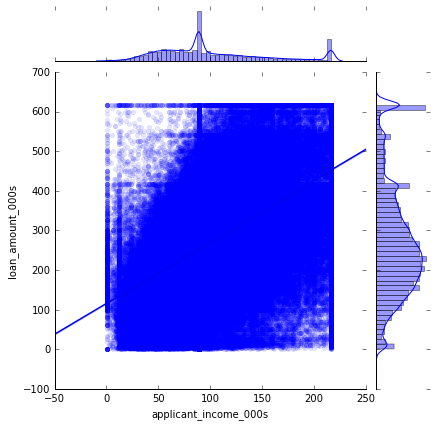

In [31]:
sns.jointplot('applicant_income_000s', 'loan_amount_000s', data=WA_HomeLoan_df_cleaned,
              kind='reg', size=6, scatter_kws={'alpha':0.1})
plt.show()

** From the statistical calculation there is no signifiance between loan amount and applicant income however scatter plot does show some positive correlation between loan amount and applicant income. **